#Task2
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  

C:\Users\郑新尧\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\郑新尧\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\郑新尧\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\郑新尧\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide 

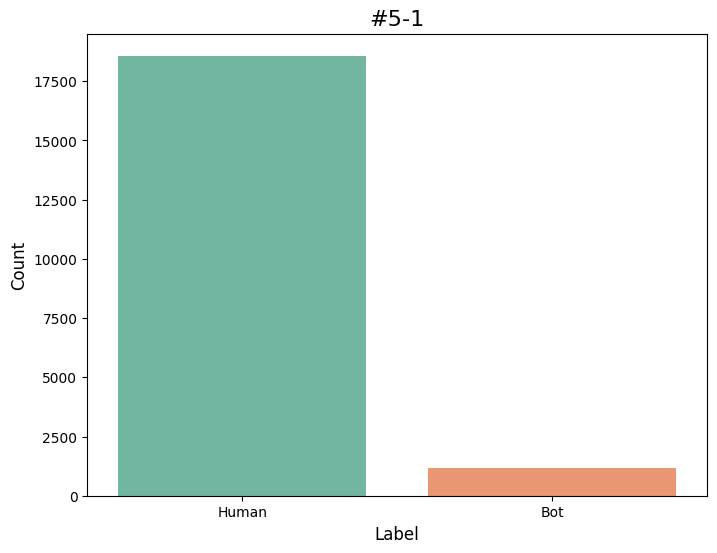

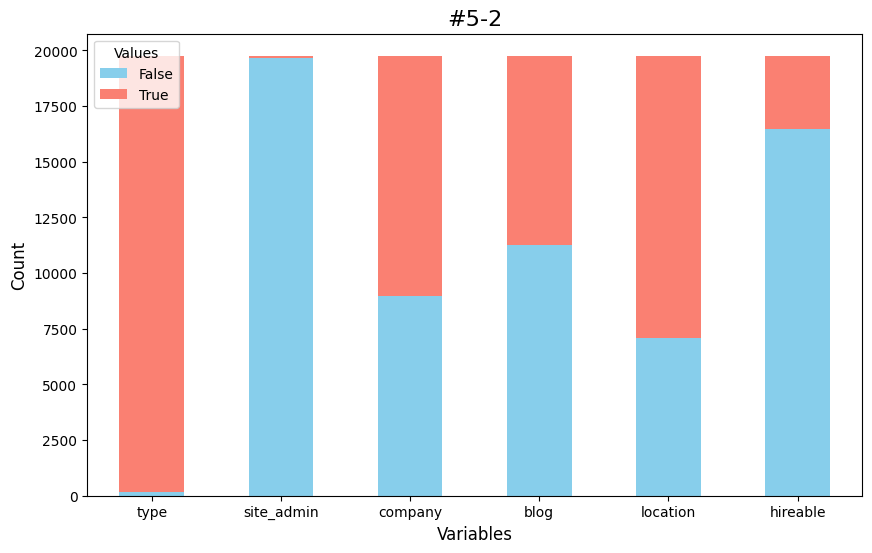

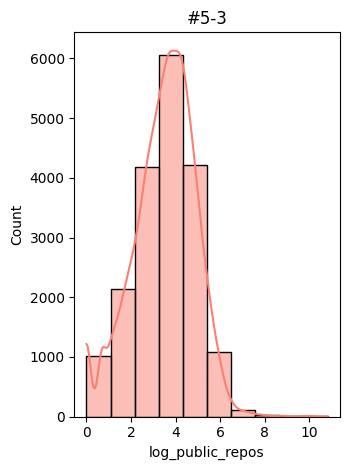

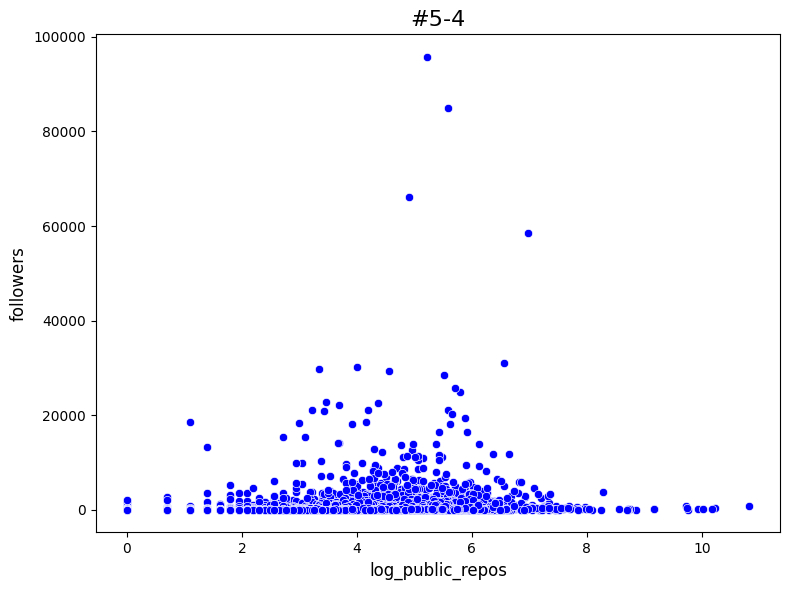

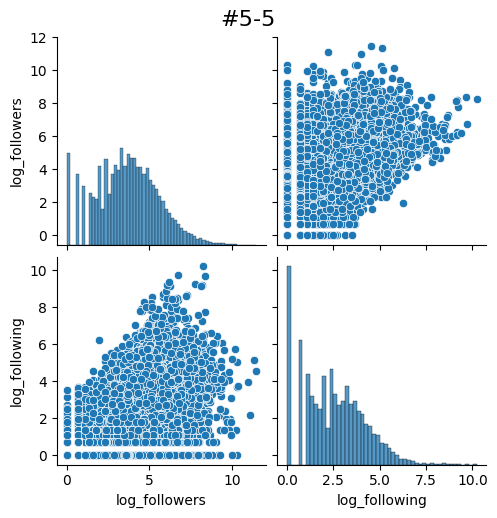

#Task6


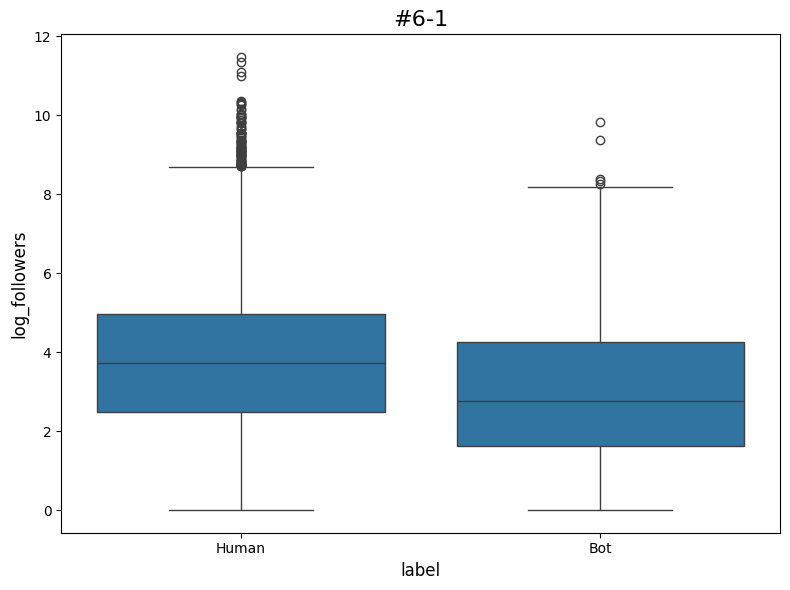

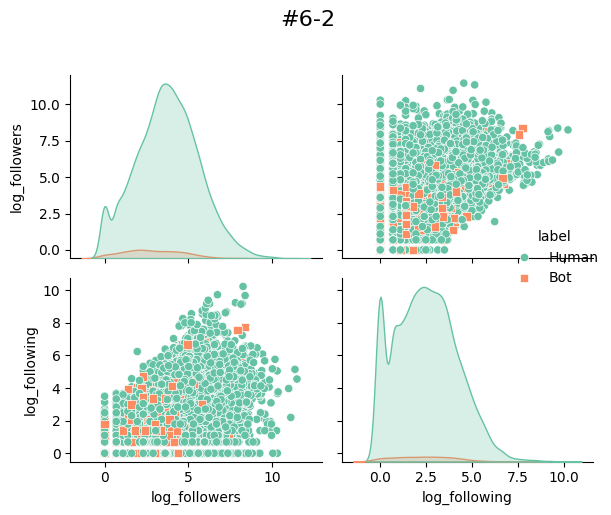

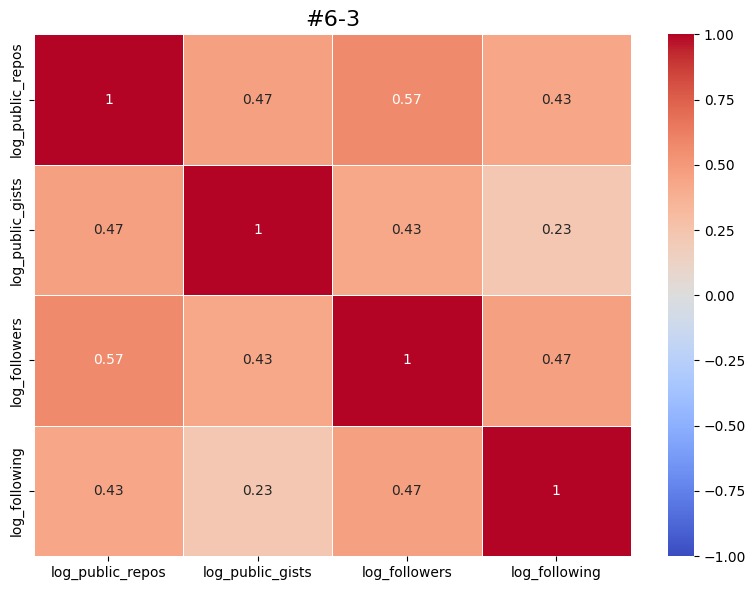

C:\Users\郑新尧\AppData\Local\Temp\ipykernel_44376\219571174.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=data, palette='Set2')


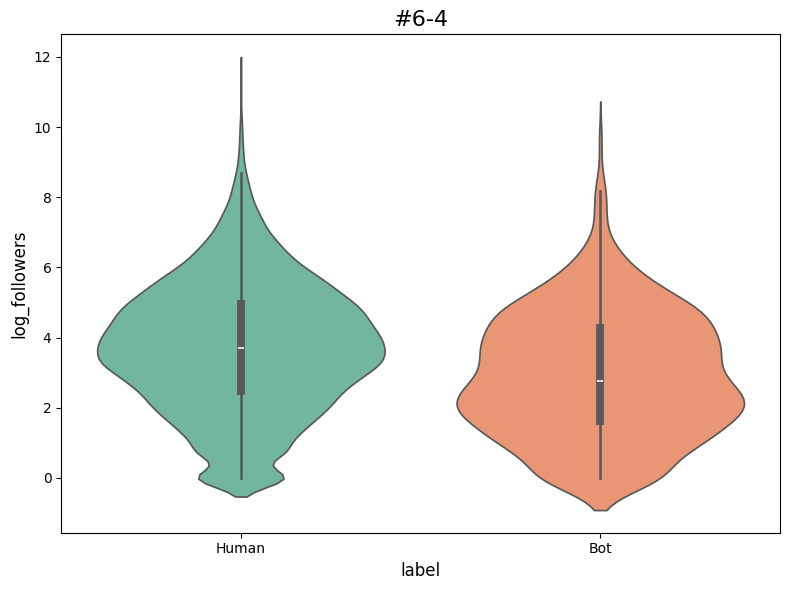

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Task1
file_path='github_bot_processed_data.csv'
data=pd.read_csv(file_path)

#Task2
print("#Task2")
print(data.head())
print()
print(data.info())
print()
print(data.describe(include='all'))
print()

#Task3
print("#Task3")
data['created_at']=pd.to_datetime(data['created_at'])
data['created_at_formatted']=data['created_at'].dt.strftime('%Y-%m-%d')
print(data[['created_at', 'created_at_formatted']].head())

#Task4
data['log_public_repos']=np.log(data['public_repos'])
data['log_public_gists']=np.log(data['public_gists'])
data['log_followers']=np.log(data['followers'])
data['log_following']=np.log(data['following'])

#Task5
print("#Task5")
#5-1
plt.figure(figsize=(8, 6))
label_counts=data['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('#5-1', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
#5-2
type_counts=data['type'].value_counts()
site_admin_counts=data['site_admin'].value_counts()
company_counts=data['company'].value_counts()
blog_counts=data['blog'].value_counts()
location_counts=data['location'].value_counts()
hireable_counts=data['hireable'].value_counts()
counts_df = pd.DataFrame({
    'type': type_counts,
    'site_admin': site_admin_counts,
    'company': company_counts,
    'blog': blog_counts,
    'location': location_counts,
    'hireable': hireable_counts
}).fillna(0) 
counts_df.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('#5-2', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Values', labels=['False', 'True'], loc='upper left')
plt.show()
#5-3
plt.subplot(1, 2, 2)
sns.histplot(data['log_public_repos'], kde=True, color='salmon', bins=10)
plt.title('#5-3')
plt.tight_layout()
plt.show()
#5-4
plt.figure(figsize=(8, 6))
data_5_4=data[['log_public_repos', 'followers']]
sns.scatterplot(x='log_public_repos', y='followers', data=data_5_4, color='blue', marker='o')
plt.title('#5-4', fontsize=16)
plt.xlabel('log_public_repos', fontsize=12)
plt.ylabel('followers', fontsize=12)
plt.tight_layout()
plt.show()
#5-5
data_5_5=data[['log_followers', 'log_following']]
sns.pairplot(data_5_5)
plt.suptitle('#5-5', size=16, y=1.02)
plt.show()

#Task6
print("#Task6")
#6-1
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('#6-1', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('log_followers', fontsize=12)
plt.tight_layout()
plt.show()
#6-2
data_6_2=data[['label', 'log_followers', 'log_following']]
sns.pairplot(data_6_2, hue='label', palette='Set2', markers=['o', 's'])
plt.suptitle('#6-2', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
#6-3
correlation_matrix=data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('#6-3', fontsize=16)
plt.tight_layout()
plt.show()
#6-4
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=data, palette='Set2')
plt.title('#6-4', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('log_followers', fontsize=12)
plt.tight_layout()
plt.show()